<a href="https://colab.research.google.com/github/parniagoodarzi/AIKNTU4032/blob/main/miniproject1q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files . upload()


Saving titanic.csv to titanic.csv


In [2]:
import pandas as pd
data = pd.read_csv(next(iter(uploaded)))  # Load the file
display(data)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data['Sex_numeric'] = data['Sex'].map({'male': 0, 'female': 1})


# only for numerical columns(not passengerId)
correlation_matrix = data.corr(numeric_only=True).drop('PassengerId', axis=0).drop('PassengerId', axis=1)

print(correlation_matrix['Survived'].sort_values(ascending=False))

Survived       1.000000
Sex_numeric    0.543351
Fare           0.257307
Parch          0.081629
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


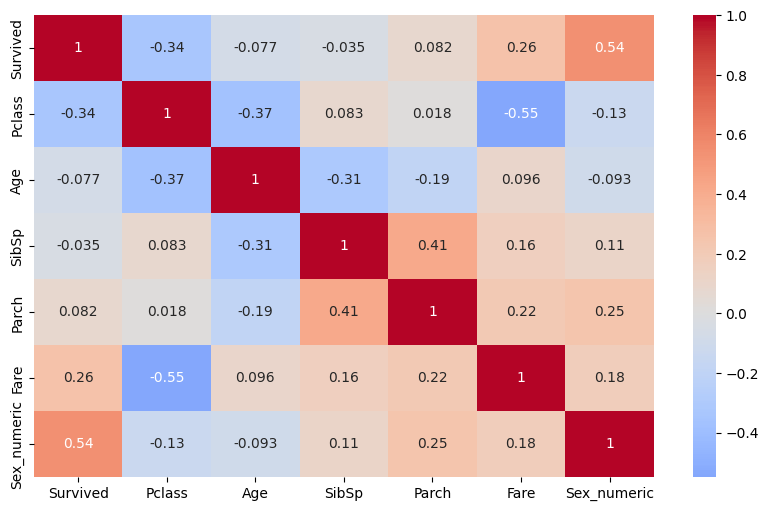

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

<ipython-input-7-d456e6d334d8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_corr.index, y='Survived', data=survival_corr, palette='coolwarm')


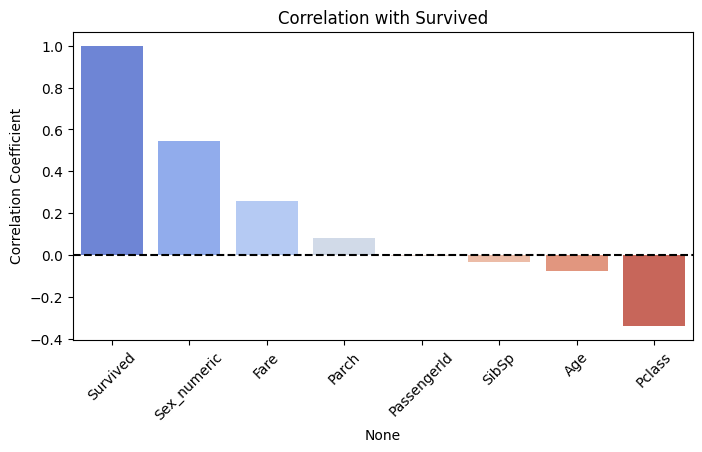

In [7]:
# Calculate correlations with 'Survived' and sort
survival_corr = data.corr(numeric_only=True)[['Survived']].sort_values(by='Survived', ascending=False)

# Display as a bar plot for clarity
plt.figure(figsize=(8, 4))
sns.barplot(x=survival_corr.index, y='Survived', data=survival_corr, palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Correlation with Survived')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

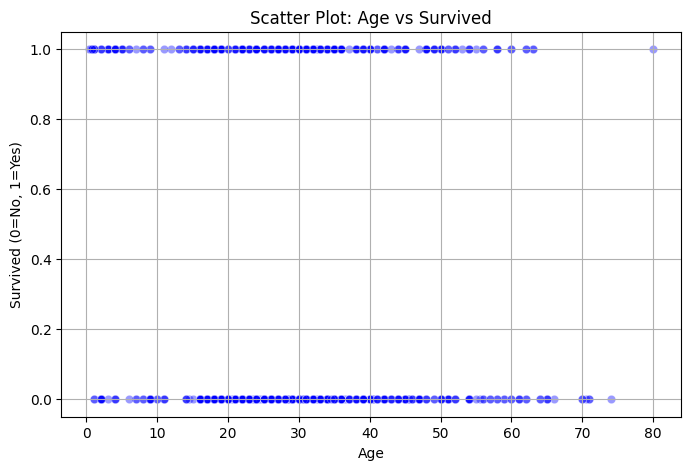

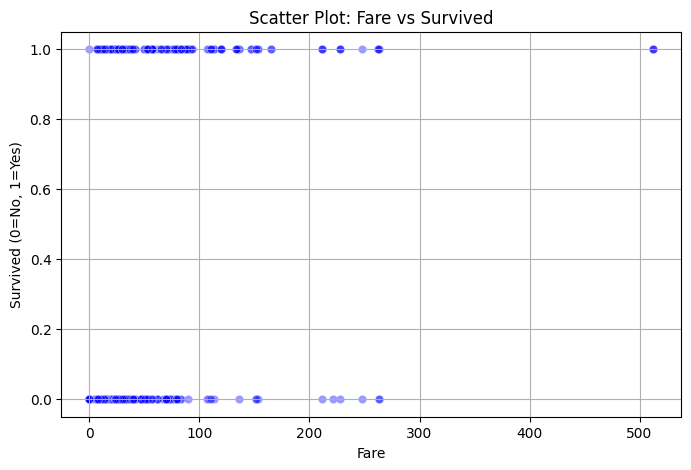

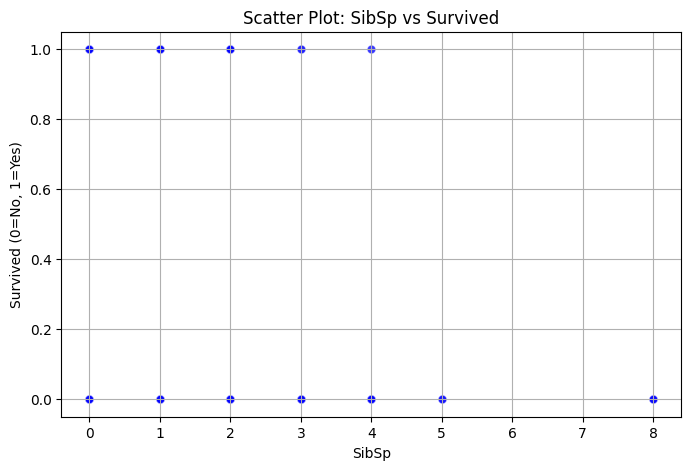

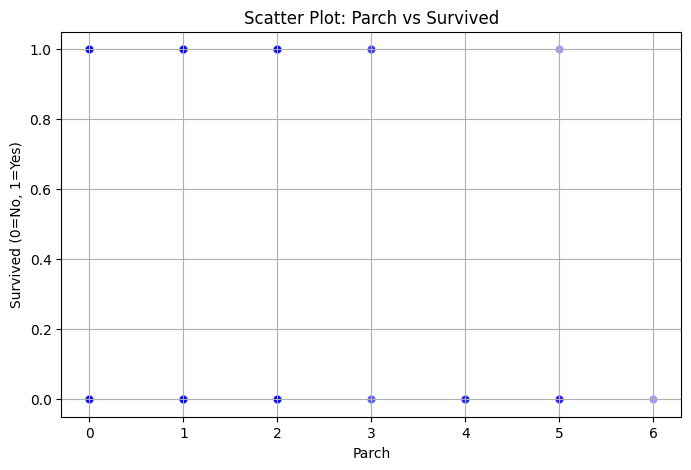

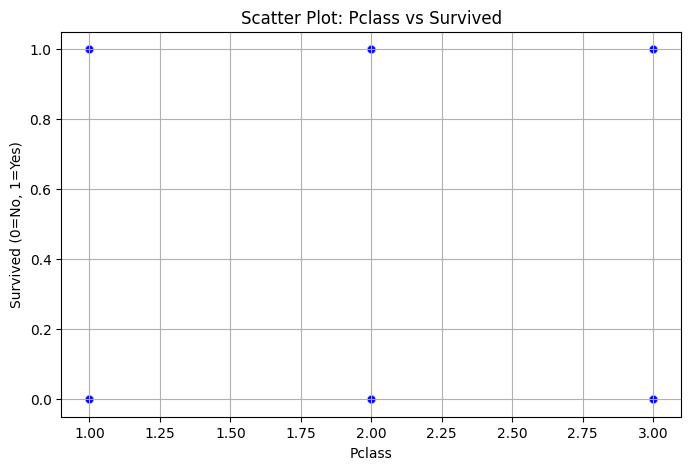

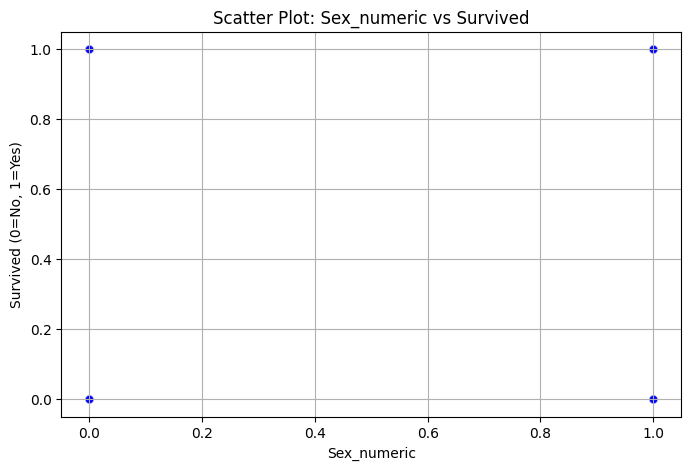

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass','Sex_numeric']

for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[feature], y=data['Survived'], alpha=0.4, color='blue')
    plt.title(f'Scatter Plot: {feature} vs Survived')
    plt.xlabel(feature)
    plt.ylabel('Survived (0=No, 1=Yes)')
    plt.grid(True)
    plt.show()

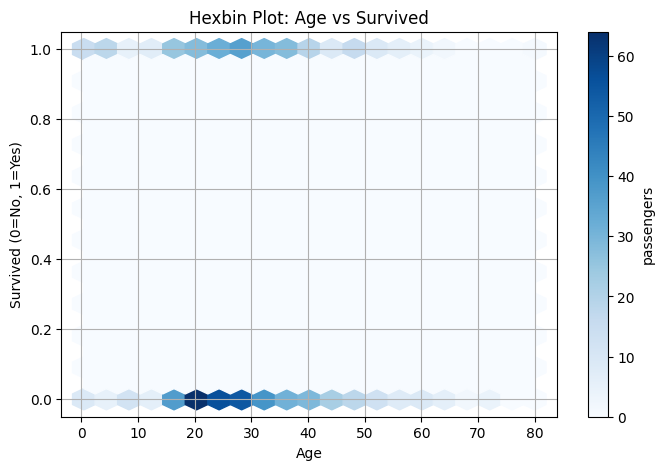

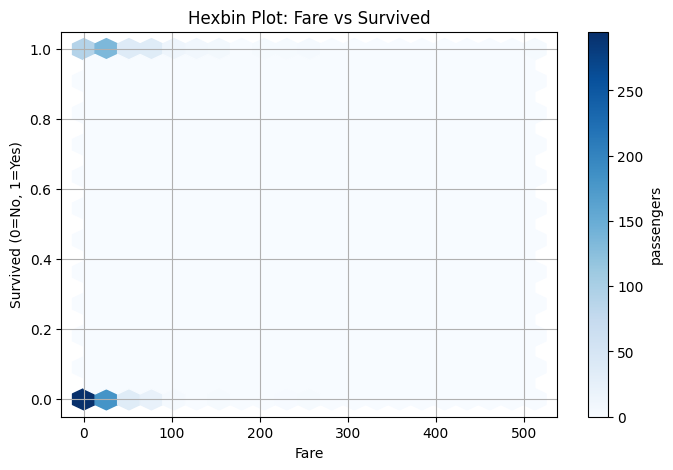

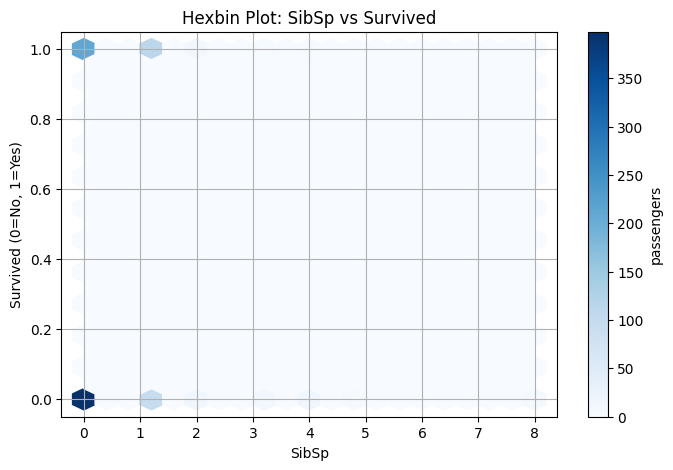

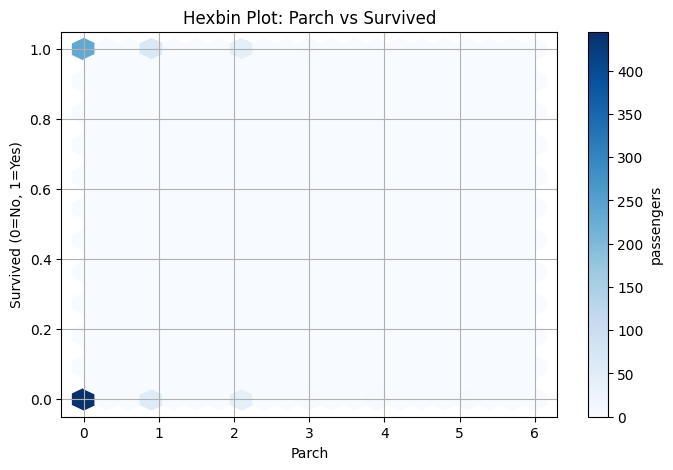

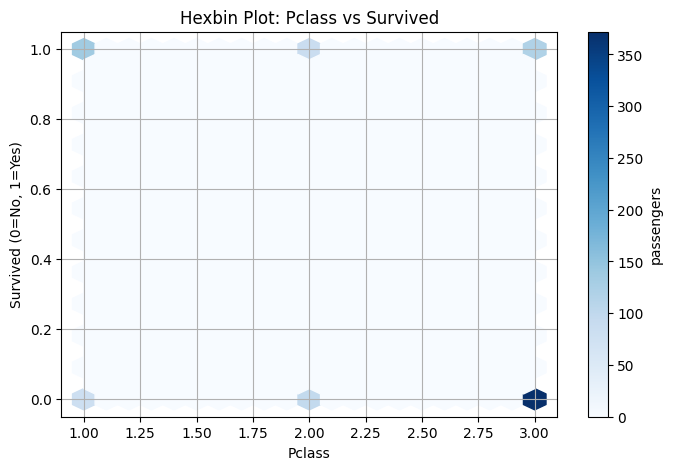

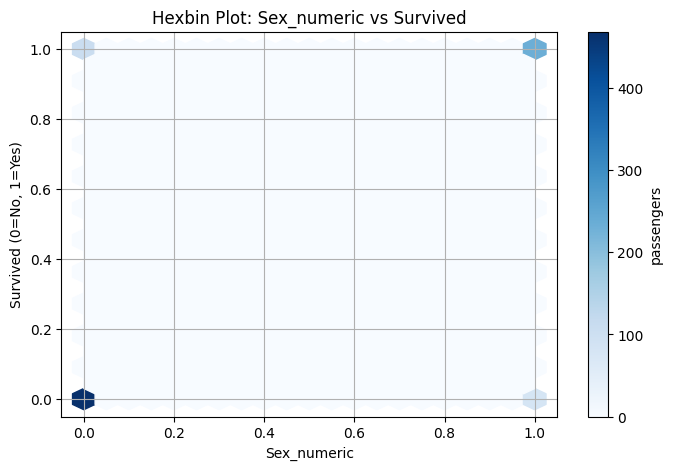

In [ ]:
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    plt.hexbin(x=data[feature], y=data['Survived'], gridsize=20, cmap='Blues')
    plt.colorbar(label='passengers')
    plt.title(f'Hexbin Plot: {feature} vs Survived')
    plt.xlabel(feature)
    plt.ylabel('Survived (0=No, 1=Yes)')
    plt.grid(True)
    plt.show()

In [9]:
import plotly.express as px

fig = px.scatter(
    data,
    x='Age',
    y='Fare',
    color='Survived',
    color_discrete_map={0: 'blue', 1: 'yellow'},
    title='<b>Survival Distribution by Age and Fare</b>',
    labels={'Age': 'Age', 'Fare': 'Fare (Pounds)', 'Survived': 'Survival Status'},
    hover_data=['Pclass', 'Sex']
)

fig.update_layout(
    hovermode='closest',
    xaxis_title='Age',
    yaxis_title='Fare Paid',
    legend_title_text='<b>Survival</b>',
    legend=dict(orientation='h', yanchor='bottom', y=1.02)
)
fig.show()

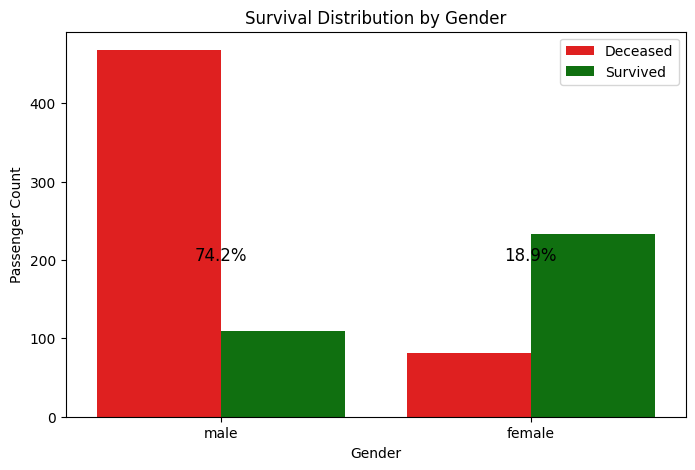

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


survival_rates = data.groupby('Sex')['Survived'].mean() * 100


plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Sex', hue='Survived', data=data, palette=['red', 'green'])
plt.title('Survival Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Passenger Count')
plt.legend(['Deceased', 'Survived'])


for i, rate in enumerate(survival_rates):
    ax.text(i, 200, f'{rate:.1f}%', ha='center', fontsize=12, color='black')

plt.show()

In [11]:
# Calculate total family size (SibSp + Parch + 1 for the passenger themselves)
data['Family_Size'] = data['SibSp'] + data['Parch'] + 1

# Categorize family size
data['Family_Type'] = pd.cut(data['Family_Size'],
                             bins=[0, 1, 4, 11],
                             labels=['Alone', 'Small Family', 'Large Family'])


family_survival = data.groupby('Family_Type', observed=True)['Survived'].mean() * 100
print(family_survival)

Family_Type
Alone           30.353818
Small Family    57.876712
Large Family    16.129032
Name: Survived, dtype: float64


In [12]:
# Create 'Is_Alone' feature
data['Is_Alone'] = (data['Family_Size'] == 1).astype(int)

# Survival comparison
alone_survival = data.groupby('Is_Alone')['Survived'].mean() * 100
print(alone_survival)

Is_Alone
0    50.564972
1    30.353818
Name: Survived, dtype: float64


In [13]:
# Define age groups
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Calculate survival rates by age group
age_survival = data.groupby('Age_Group', observed=True)['Survived'].mean() * 100
print(age_survival)

Age_Group
Child          57.971014
Teen           42.857143
Young Adult    38.268156
Adult          40.000000
Senior         22.727273
Name: Survived, dtype: float64


In [14]:
import pandas as pd

# Load the dataset
data = pd.read_csv('titanic.csv')

# Calculate missing values
missing_counts = data.isnull().sum()
missing_percentage = (missing_counts / len(data)) * 100

# Create a DataFrame to display results
missing_data = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentage.round(2)
})

# Filter to only show columns with missing data
missing_data = missing_data[missing_data['Missing Count'] > 0]
print("Columns with missing values:")
print(missing_data)

Columns with missing values:
          Missing Count  Missing Percentage
Age                 177               19.87
Cabin               687               77.10
Embarked              2                0.22


In [15]:
df = pd.read_csv("titanic.csv")
df_mean_age = df.copy()


# Fill Age with mean
df_mean_age['Age'] = df_mean_age['Age'].fillna(df_mean_age['Age'].mean())

# Fill Cabin with 'Unknown'
df_mean_age['Cabin'] = df_mean_age['Cabin'].fillna('Unknown')

print("\n--- Method 1 (Mean Age, 'Unknown' Cabin) ---")
print(df_mean_age[['Age', 'Cabin']].to_string(index=False))



--- Method 1 (Mean Age, 'Unknown' Cabin) ---
      Age           Cabin
22.000000         Unknown
38.000000             C85
26.000000         Unknown
35.000000            C123
35.000000         Unknown
29.699118         Unknown
54.000000             E46
 2.000000         Unknown
27.000000         Unknown
14.000000         Unknown
 4.000000              G6
58.000000            C103
20.000000         Unknown
39.000000         Unknown
14.000000         Unknown
55.000000         Unknown
 2.000000         Unknown
29.699118         Unknown
31.000000         Unknown
29.699118         Unknown
35.000000         Unknown
34.000000             D56
15.000000         Unknown
28.000000              A6
 8.000000         Unknown
38.000000         Unknown
29.699118         Unknown
19.000000     C23 C25 C27
29.699118         Unknown
29.699118         Unknown
40.000000         Unknown
29.699118             B78
29.699118         Unknown
66.000000         Unknown
28.000000         Unknown
42.000000         

In [ ]:
df_median_age = df.copy()

# Fill Age with median
df_median_age['Age'] = df_median_age['Age'].fillna(df_median_age['Age'].median())

# Drop rows with missing Cabin
df_median_age = df_median_age.dropna(subset=['Cabin'])

print("\n--- Method 2 (Median Age, Drop missing Cabin) ---")
print(df_median_age[['Age', 'Cabin']].to_string(index=False))



--- Method 2 (Median Age, Drop missing Cabin) ---
  Age           Cabin
38.00             C85
35.00            C123
54.00             E46
 4.00              G6
58.00            C103
34.00             D56
28.00              A6
19.00     C23 C25 C27
28.00             B78
49.00             D33
65.00             B30
28.00             C52
38.00             B28
45.00             C83
29.00             F33
25.00           F G73
23.00     C23 C25 C27
46.00             E31
71.00              A5
23.00         D10 D12
21.00             D26
47.00            C110
24.00         B58 B60
32.50            E101
54.00             D26
28.00           F E69
19.00             D47
37.00            C123
24.00             B86
36.50              F2
22.00              C2
28.00             E33
61.00             B19
56.00              A7
50.00             C49
 1.00              F4
28.00             A32
 3.00              F2
44.00              B4
58.00             B80
 2.00              G6
40.00             A31
31.

In [ ]:
df_grouped_age = df.copy()

# Fill Age using group-wise mean per Pclass
df_grouped_age['Age'] = df_grouped_age.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

# Fill Cabin with mode
most_frequent_cabin = df_grouped_age['Cabin'].mode()[0]
df_grouped_age['Cabin'] = df_grouped_age['Cabin'].fillna(most_frequent_cabin)

print("\n--- Method 3 (Group-wise Mean Age by Pclass, Mode Cabin) ---")
print(df_grouped_age[['Pclass', 'Age', 'Cabin']].to_string(index=False))



--- Method 3 (Group-wise Mean Age by Pclass, Mode Cabin) ---
 Pclass       Age           Cabin
      3 22.000000         B96 B98
      1 38.000000             C85
      3 26.000000         B96 B98
      1 35.000000            C123
      3 35.000000         B96 B98
      3 25.140620         B96 B98
      1 54.000000             E46
      3  2.000000         B96 B98
      3 27.000000         B96 B98
      2 14.000000         B96 B98
      3  4.000000              G6
      1 58.000000            C103
      3 20.000000         B96 B98
      3 39.000000         B96 B98
      3 14.000000         B96 B98
      2 55.000000         B96 B98
      3  2.000000         B96 B98
      2 29.877630         B96 B98
      3 31.000000         B96 B98
      3 25.140620         B96 B98
      2 35.000000         B96 B98
      2 34.000000             D56
      3 15.000000         B96 B98
      1 28.000000              A6
      3  8.000000         B96 B98
      3 38.000000         B96 B98
      3 25.140620   

In [16]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [17]:
df_cleaned = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
print("Remaining columns after dropping unnecessary ones:")
print(df_cleaned.columns)


Remaining columns after dropping unnecessary ones:
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [9]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
exclude_columns = ['PassengerId', 'Survived','Embarked_target','Sex_target','Pclass']
numerical_features = [col for col in numerical_features if col not in exclude_columns]

auto_categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features = auto_categorical + ['Survived']+['Pclass']

print("Numerical Features:")
print(numerical_features)

print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
['Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'FamilySize', 'IsAlone', 'Survival_Class']

Categorical Features:
['Name', 'Sex', 'Title', 'Survived', 'Pclass']


In [ ]:
#One-Hot Encoding
df = pd.read_csv('titanic.csv')
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ... 

In [19]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import FeatureHasher

label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])

print(df['Sex'])



0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64


In [ ]:
# Target Encoding
df = pd.read_csv("titanic.csv")
embarked_target = df.groupby('Embarked')['Survived'].mean()
df['Embarked_target'] = df['Embarked'].map(embarked_target)
sex_target = df.groupby('Sex')['Survived'].mean()
df['Sex_target'] = df['Sex'].map(sex_target)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
import pandas as pd
df = pd.read_csv("titanic.csv")
# Frequency Encoding
embarked_freq = df['Embarked'].value_counts() / len(df)
df['Embarked_freq'] = df['Embarked'].map(embarked_freq)

sex_freq = df['Sex'].value_counts() / len(df)
df['Sex_freq'] = df['Sex'].map(sex_freq)

# Target Encoding
embarked_target = df.groupby('Embarked')['Survived'].mean()
df['Embarked_target'] = df['Embarked'].map(embarked_target)
sex_target = df.groupby('Sex')['Survived'].mean()
df['Sex_target'] = df['Sex'].map(sex_target)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)

# Create new features
df['FamilySize'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Select final features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone']
X = pd.get_dummies(df[features], columns=['Sex'])
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2]:
print("ویژگی‌های استخراج شده جدید:")
print(df[['FamilySize', 'IsAlone', 'Title']].head())
print("\nویژگی‌های نهایی انتخاب شده:")
print(features)
print("\nستون‌های نهایی پس از تبدیل داممی:")
print(X.columns.tolist())
print("\nنمونه‌ای از داده‌های ورودی مدل:")
print(X.head())

ویژگی‌های استخراج شده جدید:
   FamilySize  IsAlone Title
0           2        0   NaN
1           2        0   NaN
2           1        1   NaN
3           2        0   NaN
4           1        1   NaN

ویژگی‌های نهایی انتخاب شده:
['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone']

ستون‌های نهایی پس از تبدیل داممی:
['Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male']

نمونه‌ای از داده‌های ورودی مدل:
   Pclass   Age     Fare  FamilySize  IsAlone  Sex_female  Sex_male
0       3  22.0   7.2500           2        0       False      True
1       1  38.0  71.2833           2        0        True     False
2       3  26.0   7.9250           1        1        True     False
3       1  35.0  53.1000           2        0        True     False
4       3  35.0   8.0500           1        1       False      True


In [3]:
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression

# Recursive Feature Elimination (RFE)
lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr, n_features_to_select=4)
rfe.fit(X_train_scaled, y_train)
rfe_features = X.columns[rfe.support_]

# L1-based Feature Selection (Lasso)
lasso = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))
lasso.fit(X_train_scaled, y_train)
lasso_features = X.columns[lasso.get_support()]

print("Features selected by RFE:", rfe_features)
print("Features selected by Lasso:", lasso_features)

Features selected by RFE: Index(['Pclass', 'Age', 'Sex_female', 'Sex_male'], dtype='object')
Features selected by Lasso: Index(['Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female',
       'Sex_male'],
      dtype='object')


Training accuracy: 0.8180535966149506
Test accuracy: 0.7528089887640449

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.82       111
           1       0.73      0.55      0.63        67

    accuracy                           0.75       178
   macro avg       0.74      0.71      0.72       178
weighted avg       0.75      0.75      0.74       178



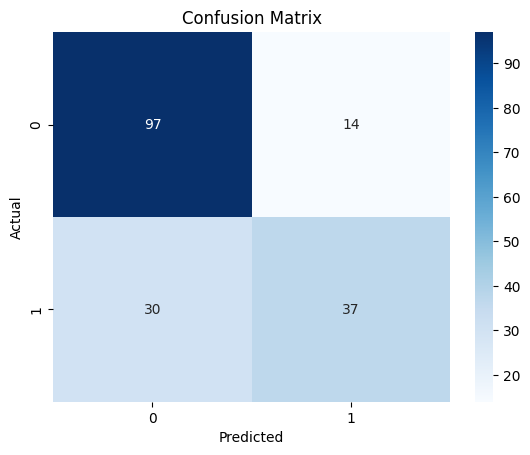

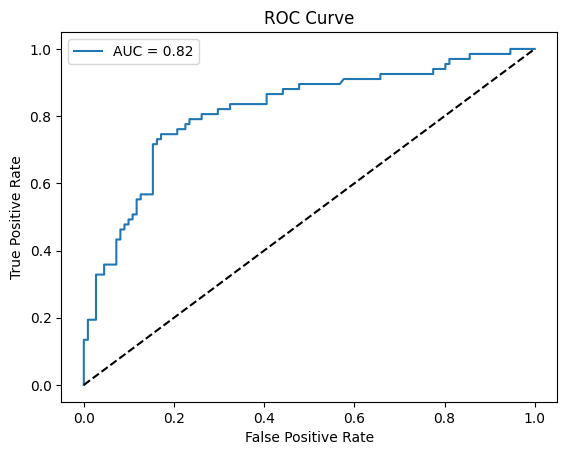

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Model training
lr_binary = LogisticRegression(max_iter=1000)
lr_binary.fit(X_train_scaled, y_train)

# Model evaluation
y_pred = lr_binary.predict(X_test_scaled)
y_proba = lr_binary.predict_proba(X_test_scaled)[:, 1]

print("Training accuracy:", lr_binary.score(X_train_scaled, y_train))
print("Test accuracy:", lr_binary.score(X_test_scaled, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [5]:
# Create new survival classes
df['Survival_Class'] = pd.cut(df['Survived'], bins=[-1, 0.3, 0.7, 1.1], labels=[0, 1, 2])
X_multi = X
y_multi = df['Survival_Class']

# Train-test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Feature scaling
X_train_m_scaled = scaler.fit_transform(X_train_m)
X_test_m_scaled = scaler.transform(X_test_m)

# One-vs-Rest model
lr_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)
lr_ovr.fit(X_train_m_scaled, y_train_m)

# Multinomial model
lr_multi = LogisticRegression(multi_class='multinomial', max_iter=1000)
lr_multi.fit(X_train_m_scaled, y_train_m)

# Model evaluation
print("\nOne-vs-Rest accuracy:", lr_ovr.score(X_test_m_scaled, y_test_m))
print("Multinomial accuracy:", lr_multi.score(X_test_m_scaled, y_test_m))

# Class distribution
print("\nClass distribution:")
print(y_multi.value_counts())


One-vs-Rest accuracy: 0.7528089887640449
Multinomial accuracy: 0.7528089887640449

Class distribution:
Survival_Class
0    545
2    342
1      0
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [7]:
# Get binary logistic regression coefficients
import numpy as np
binary_coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_binary.coef_[0]
})

# Calculate odds ratios
binary_coef['Odds_Ratio'] = np.exp(binary_coef['Coefficient'])

print("Binary Logistic Regression Coefficients:")
print(binary_coef.sort_values('Coefficient', ascending=False))

Binary Logistic Regression Coefficients:
      Feature  Coefficient  Odds_Ratio
5  Sex_female     0.676924    1.967815
2        Fare     0.187538    1.206276
4     IsAlone    -0.374341    0.687742
1         Age    -0.520498    0.594224
6    Sex_male    -0.676924    0.508178
3  FamilySize    -0.808448    0.445549
0      Pclass    -0.862932    0.421923


In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1. ایجاد کلاس‌های معتبر
df['Survival_Class'] = pd.cut(df['Survived'],
                             bins=[-0.1, 0.4, 0.7, 1.1],  # نقاط تقسیم اصلاح شده
                             labels=[0, 1, 2])

# 2. بررسی توزیع کلاس‌ها
print("توزیع کلاس‌های جدید:")
print(df['Survival_Class'].value_counts())

# 3. اگر هنوز کلاس 1 وجود ندارد، به دو کلاس بسنده کنید
if len(df['Survival_Class'].unique()) < 3:
    print("\nتوجه: فقط دو کلاس در داده‌ها وجود دارد. از مدل باینری استفاده می‌کنیم.")
    df['Survival_Class'] = df['Survived']  # استفاده از کلاس‌های اصلی 0 و 1

    # مدل باینری
    lr_binary = LogisticRegression(max_iter=1000)
    lr_binary.fit(X_train, y_train)

    # نمایش ضرایب
    binary_coef = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': lr_binary.coef_[0],
        'Odds_Ratio': np.exp(lr_binary.coef_[0])
    })
    print("\nضرایب مدل باینری:")
    print(binary_coef.sort_values('Odds_Ratio', ascending=False))

else:
    # مدل چندکلاسه
    lr_multi = LogisticRegression(multi_class='multinomial', max_iter=1000)
    lr_multi.fit(X_train, y_train)

    # نمایش ضرایب
    coef_df = pd.DataFrame(lr_multi.coef_,
                          columns=X.columns,
                          index=[f'Class_{i}' for i in range(len(lr_multi.classes_))])

    print("\nضرایب مدل چندکلاسه:")
    print(coef_df)
    print("\nنسبت شانس:")
    print(np.exp(coef_df))

توزیع کلاس‌های جدید:
Survival_Class
0    545
2    342
1      0
Name: count, dtype: int64

توجه: فقط دو کلاس در داده‌ها وجود دارد. از مدل باینری استفاده می‌کنیم.

ضرایب مدل باینری:
      Feature  Coefficient  Odds_Ratio
5  Sex_female     1.380370    3.976374
2        Fare     0.003743    1.003750
1         Age    -0.037320    0.963368
3  FamilySize    -0.480896    0.618229
4     IsAlone    -0.741938    0.476190
0      Pclass    -1.021827    0.359937
6    Sex_male    -1.378864    0.251865
